# Support Vector Machines

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
from sklearn.datasets import load_breast_cancer

In [90]:
cancer=load_breast_cancer()

In [91]:
# exploring dataset in a form of deictionary
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Gives us predictions if the breast cancer Malignant or Benign, and other information


In [92]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [93]:
df_feat=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [94]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [95]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [96]:
df_feat.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [97]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Exploratory Data Analysis

In [98]:
# sns.pairplot(df_feat,hue=cancer['target'])

In [99]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Train Test Split

In [100]:
df_target = pd.DataFrame(cancer['target'],columns=['Breast_Cancer'])

In [101]:
df_target.head()

,Breast_Cancer
0,0
1,0
2,0
3,0
4,0


In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X=df_feat
# y=cancer['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)

In [104]:
from sklearn.svm import SVC

In [105]:
model=SVC()

In [106]:
model.fit(X_train,y_train)

SVC()

In [107]:
predictions=model.predict(X_test)

In [108]:
from sklearn.metrics import classification_report,confusion_matrix

In [109]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 56  10]
 [  3 102]]


              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



* **C**: Regularization parameter for SVM.
* **gamma**: Kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’ kernels.
* **kernel**: Specifies the kernel type (e.g., linear, rbf, polynomial).

In [110]:
print(model.get_params())


{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


## GridSearch
if the result on one of the parameters was 0 with gridsearch we could search for the best parameter, and allows you to find the right parameter   

Not to mention we can use GridSearch with the following models:
Below is a list of common models and their tunable hyperparameters you can optimize with GridSearchCV:

1. **Logistic Regression** (LogisticRegression)
penalty (e.g., 'l1', 'l2'): Regularization type.
C: Regularization strength.
solver (e.g., 'liblinear', 'saga'): Algorithm to solve optimization problems.
2. **Decision** Tree Classifier (DecisionTreeClassifier)
max_depth: Maximum depth of the tree.
min_samples_split: Minimum samples required to split a node.
min_samples_leaf: Minimum samples required in a leaf node.
criterion (e.g., 'gini', 'entropy'): Function to measure the quality of a split.
3. **Random Forest Classifier** (RandomForestClassifier)
n_estimators: Number of trees in the forest.
max_depth: Maximum depth of each tree.
min_samples_split: Minimum samples to split a node.
max_features: Number of features to consider when looking for the best split.
4. **k-Nearest Neighbors** (KNeighborsClassifier)
n_neighbors: Number of neighbors to use.
weights (e.g., 'uniform', 'distance'): Weight function used in prediction.
metric (e.g., 'euclidean', 'manhattan'): Distance metric.
5. **Gradient Boosting** (GradientBoostingClassifier)
n_estimators: Number of boosting stages.
learning_rate: Step size shrinkage.
max_depth: Maximum depth of the tree.
subsample: Fraction of samples used for fitting the individual base learners.
6. **XGBoost** (XGBClassifier)
n_estimators: Number of boosting rounds.
learning_rate: Step size for updating weights.
max_depth: Maximum depth of each tree.
gamma: Minimum loss reduction for a split.
subsample: Fraction of samples used for training.
7. **Neural Networks** (MLPClassifier)
hidden_layer_sizes: Number of neurons in hidden layers.
activation (e.g., 'relu', 'tanh'): Activation function for neurons.
solver: Optimization algorithm (e.g., 'adam', 'sgd').
alpha: L2 regularization term.

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':    [1,0.1,0.01,0.001,0.0001]}

In [113]:
grid=GridSearchCV(SVC(),param_grid,verbose=3)

In [114]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.637 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [115]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [116]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [117]:
grid.best_score_

0.9472468354430379

In [118]:
grid_predictions = grid.predict(X_test)

In [119]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))


[[ 59   7]
 [  4 101]]


              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



SVM on Iris DataSet

In [120]:
from IPython.display import display, Image

# URL of the Iris Setosa image
url = 'http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg'

# Display the image with specific width and height
display(Image(url=url, width=300, height=300))

In [121]:
from sklearn.datasets import load_iris

In [122]:
df=load_iris()

In [123]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [124]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [125]:
iris = pd.DataFrame(df.data, columns=df.feature_names)

In [126]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [127]:
iris['target'] = df.target

# (Optional) Map the target numbers to their corresponding species names
iris['species'] = iris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


In [128]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [129]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [130]:
import seaborn as sns
iris_df = sns.load_dataset('iris')

In [131]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [132]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Exploratory Data Analysis

We can see setosa is highly separable from other classes

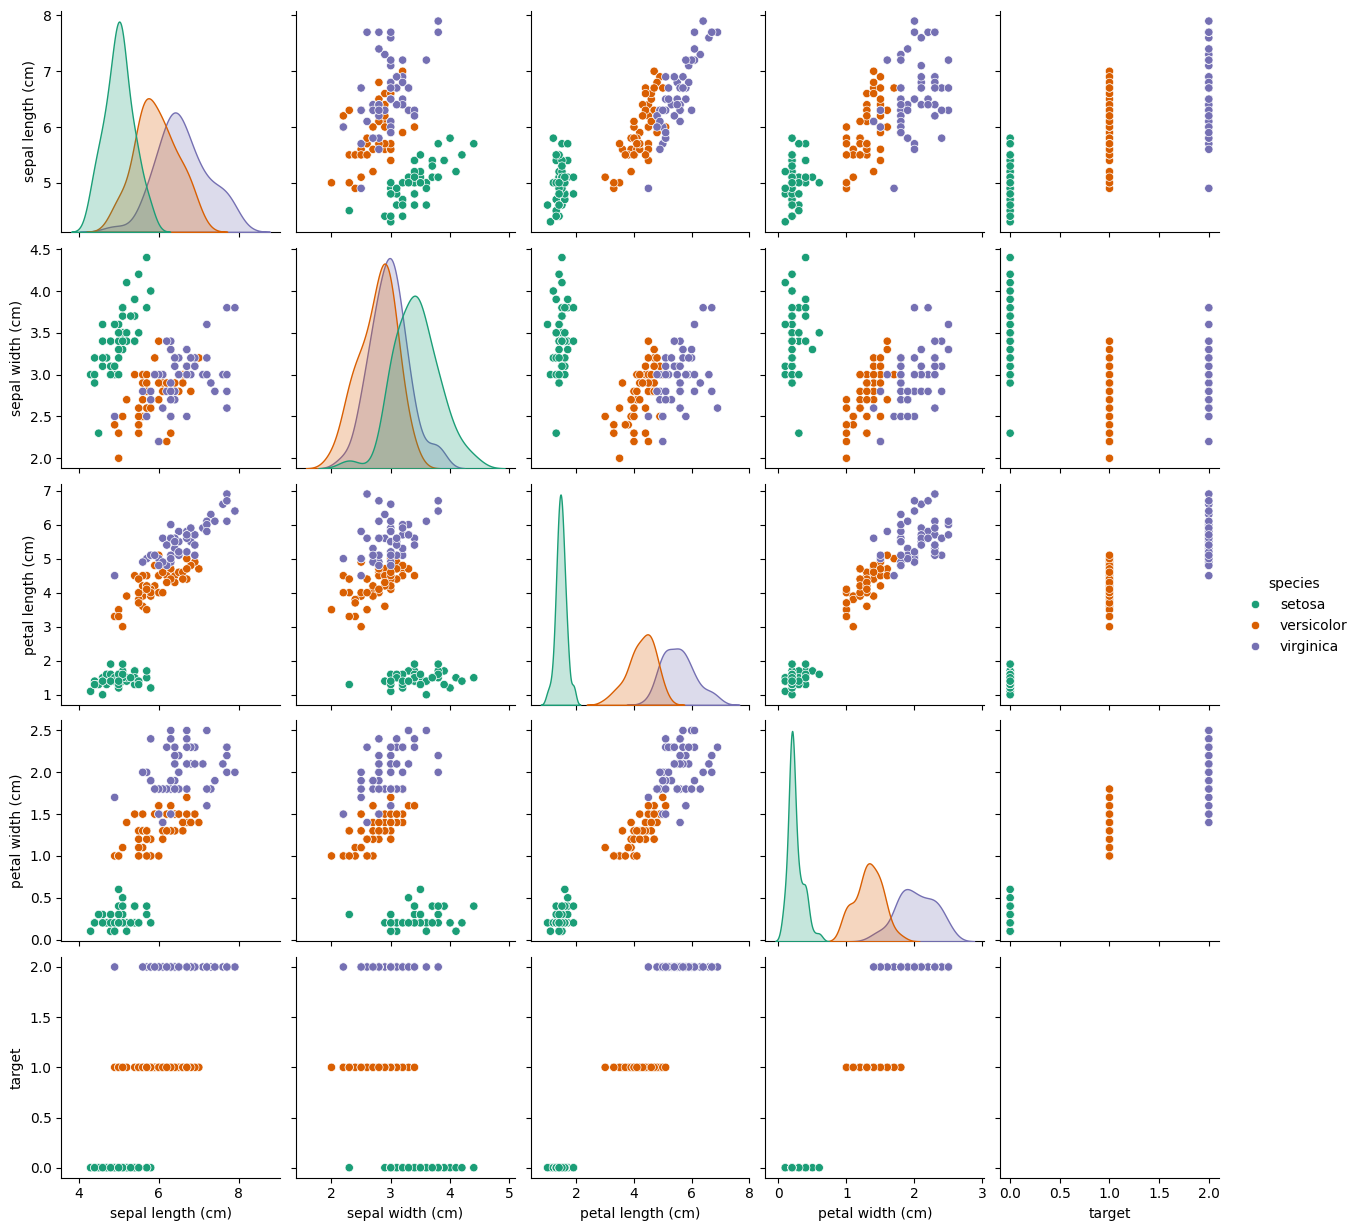

In [133]:
sns.pairplot(iris,hue='species', palette='Dark2')

In [134]:
# Creatin a Boolean mask
ssd=iris['species']=='setosa'
setosa_df = iris[ssd]
setosa_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [135]:
setosa=iris[iris['species']=='setosa']
setosa.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [137]:
iris.columns = iris.columns.str.replace(' (cm)', '', regex=False).str.replace(' ', '_')


<Axes: xlabel='sepal_width', ylabel='sepal_length'>

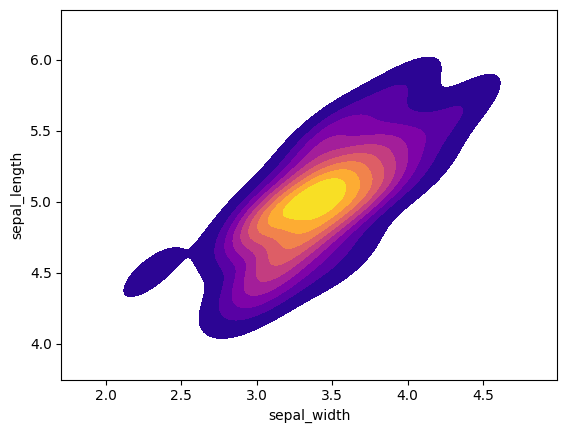

In [138]:
setosa=iris[iris['species']=='setosa']
sns.kdeplot( x=setosa['sepal_width'], y=setosa['sepal_length'],
                 cmap="plasma",fill=True)

In [139]:
setosa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  50 non-null     float64
 1   sepal_width   50 non-null     float64
 2   petal_length  50 non-null     float64
 3   petal_width   50 non-null     float64
 4   target        50 non-null     int64  
 5   species       50 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 2.7+ KB


In [140]:
from sklearn.model_selection import train_test_split

In [141]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [143]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [144]:
X=iris.drop('species',axis=1)
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [145]:
from sklearn.svm import SVC

In [146]:
svc_model=SVC()

In [147]:
svc_model.fit(X_train,y_train)

SVC()

In [148]:
predict=svc_model.predict(X_test)

In [149]:
from sklearn.metrics import confusion_matrix,classification_report

In [150]:
print(confusion_matrix(y_test,predict))
print('\n')
print(classification_report(y_test,predict))

[[14  0  0]
 [ 0 14  0]
 [ 0  0 17]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## GridSearch

In [151]:
from sklearn.model_selection import GridSearchCV

In [152]:
param_grid={'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}

In [153]:
grid=GridSearchCV(SVC(),param_grid,verbose=2)

In [154]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [155]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [156]:
grid_predictions=grid.predict(X_test)

In [157]:
print(confusion_matrix(y_test,predict))
print('\n')
print(classification_report(y_test,predict))

[[14  0  0]
 [ 0 14  0]
 [ 0  0 17]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

